# Introduction

This notebook contains all the code needed to 1) generate non-demographic model figures and 2) compare the model ranks for demographic models considered in both the autosomal analysis and X chromosome analysis. The addition of subplot lettering for the autosome and X chrosome site patterns was done in Inkscape.

Let's get started by loading all the necessary libraries.

In [1]:
library(corrplot)
library(cowplot)
library(dplyr)
library(ggplot2)
library(reshape)
library(tidyverse)
options(scipen = 999)

corrplot 0.92 loaded


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename


The following object is masked from ‘package:cowplot’:

    stamp


── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ purrr   0.3.4
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand()   masks reshape::expand()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ reshape::rename() masks dplyr::rename()



## Autosome Site Pattern Frequencies

Load the data and convert the point estimate and lower/upper bound branch lengths to frequencies in new columns. The input data are from the output of the "sitepat" program.

In [2]:
autosome_site_patterns <- read.csv('data/pan_autosome_site_pat.csv', header = TRUE, sep = ',')
autosome_site_patterns$point_estimate_prop <- autosome_site_patterns$point_estimate/sum(autosome_site_patterns$point_estimate)
autosome_site_patterns$low_bound_prop <- autosome_site_patterns$low_bound/sum(autosome_site_patterns$low_bound)
autosome_site_patterns$high_bound_prop <- autosome_site_patterns$high_bound/sum(autosome_site_patterns$high_bound)

Let's take a quick peak at the data and make sure everything looks good.

In [3]:
head(autosome_site_patterns)

,site_pat,point_estimate,low_bound,high_bound,point_estimate_prop,low_bound_prop,high_bound_prop
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,b,4301591.11,4292013.32,4309580.56,0.281147537,0.28139751,0.28082866
2,e,1573214.40,1571335.70,1575447.36,0.102823662,0.10302157,0.10266214
3,c,1696866.44,1695176.24,1698130.76,0.110905432,0.11114093,0.11065666
4,n,1601703.25,1598904.85,1603821.06,0.104685665,0.10482909,0.10451108
5,w,1442490.14,1439001.03,1445728.03,0.094279661,0.09434530,0.09420914
6,be,71271.45,70457.98,72153.85,0.004658228,0.00461944,0.00470182


In [4]:
autosome_site_patterns$site_pat <- fct_inorder(autosome_site_patterns$site_pat) %>% fct_rev()
subset_autosome_site_patterns <- subset(autosome_site_patterns, point_estimate_prop<0.03)

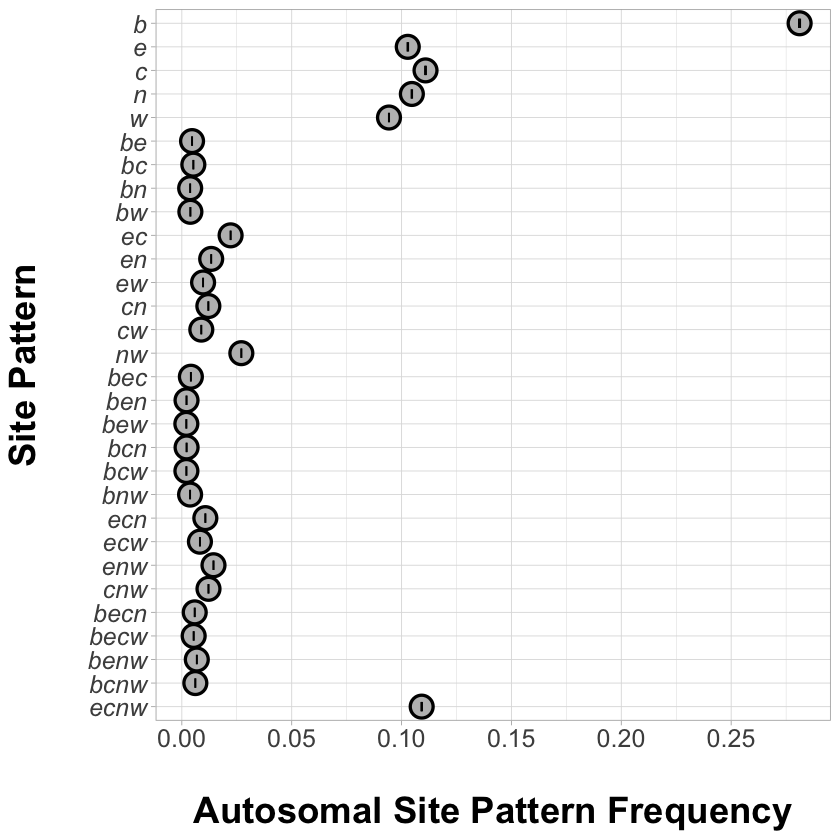

In [5]:
p1 <- ggplot(autosome_site_patterns) + geom_point(data=autosome_site_patterns, aes(x=point_estimate_prop, y=site_pat), shape = 21, color="black", fill="gray", size=5.5, stroke = 1.4) + 
  geom_errorbarh(data=autosome_site_patterns, aes(y=site_pat, xmin=low_bound_prop, xmax=high_bound_prop), height = 0.4) + 
  xlab("\nAutosomal Site Pattern Frequency") + ylab("Site Pattern\n") + theme_light() + theme(axis.title = element_text(size = 22, face = "bold")) + 
  theme(axis.text.x = element_text(size = 15), axis.text.y = element_text(size = 15, face = "italic")) + 
  scale_x_continuous(breaks=seq(0,0.3,0.05))

p1

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



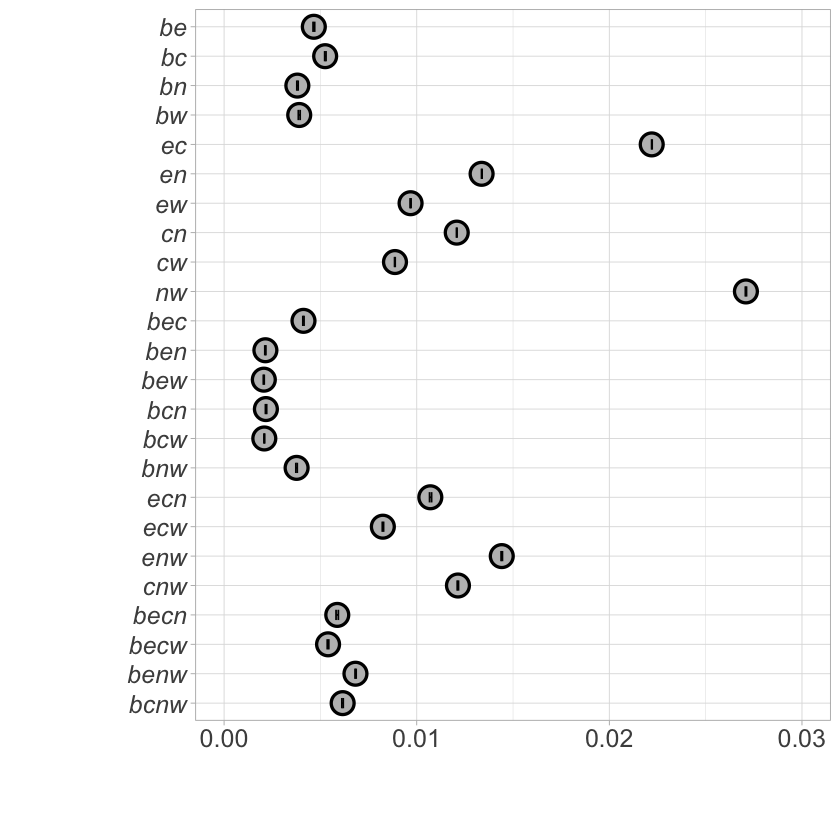

In [6]:
p2 <- ggplot(autosome_site_patterns) + geom_point(data=subset_autosome_site_patterns, aes(x=point_estimate_prop, y=site_pat), shape = 21, color="black", fill="gray", size=5.5, stroke = 1.4) + 
  geom_errorbarh(data=subset_autosome_site_patterns, aes(y=site_pat, xmin=low_bound_prop, xmax=high_bound_prop), height = 0.35) + 
  xlab("\n") + ylab("\n\n") + theme_light() + theme(axis.title = element_text(size = 22, face = "bold")) + 
  theme(axis.text.x = element_text(size = 15), axis.text.y = element_text(size = 15, face = "italic")) + 
  scale_x_continuous(breaks=seq(0,0.3,0.05)) + xlim(0,0.03) 

p2

In [7]:
png("autosome_site_pattern_plot.png", width = 16, height = 10, units = "in", res = 400)
plot_grid(p1, p2, nrow=1)
dev.off()

pdf 
  2

## Comparative Autosome Best Model Fit

Load the data. These data are the branch lengths per site pattern for 51 data points (the observed site pattern and 50 bootstrap replicates) for 1) the observed data, 2) a poorly fit model, 3) an average fit model, and 4) the best fit model.

In [8]:
obs <- read.csv("data/obs.csv", header = TRUE, sep = ",")
null <- read.csv("data/null2.csv", header = TRUE, sep = ",")
be <- read.csv("data/be2.csv", header = TRUE, sep = ",")
cf <- read.csv("data/cf.csv", header = TRUE, sep = ",")

Convert branch lengths to frequencies.

In [9]:
obs2 <- obs/rowSums(obs)
null2 <- null/rowSums(null)
be2 <- be/rowSums(be)
cf2 <- cf/rowSums(cf)

Calculate the residuals.

In [10]:
null_resid <- obs2-null2
be_resid <- obs2-be2
cf_resid <- obs2-cf2

Add a column designating which row represents the observed data and which are bootstraps.

In [11]:
obs_bootstrap <- c('obs','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap')

null_resid <- cbind(obs_bootstrap, null_resid)
be_resid <- cbind(obs_bootstrap, be_resid)
cf_resid <- cbind(obs_bootstrap, cf_resid)

Melt the dataframes to make plotting easier.

In [12]:
null_resid <- melt(null_resid, id=c("obs_bootstrap"))
be_resid <- melt(be_resid, id=c("obs_bootstrap"))
cf_resid <- melt(cf_resid, id=c("obs_bootstrap"))

Create a subset of just the observed data for plotting.

In [13]:
null_obs <- subset(null_resid, obs_bootstrap == "obs")
be_obs <- subset(be_resid, obs_bootstrap == "obs")
cf_obs <- subset(cf_resid, obs_bootstrap == "obs")

Plot.

In [14]:
p3 <- ggplot(data = null_resid, aes(x=value, y=variable)) + 
  geom_vline(aes(xintercept = 0), colour = "black") +
  geom_point(data = null_obs, shape=21, colour="black", fill="gray", size=4, stroke=0.75) + 
  stat_summary(geom = "errorbar", width = 0.3, fun.min = min, fun.max = max) +
  scale_y_discrete(limits = rev(levels(null_resid$variable))) + 
  xlab("\nObserved minus Fitted\n\nNull2") + ylab("") + 
  ggtitle('Average Fit\n') +
  scale_x_continuous(limits=c(-0.01,0.01)) + theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold", hjust=0.5)) +
  theme(axis.title = element_text(size = 16, face = "bold")) + 
  theme(axis.text.x = element_text(size = 10), axis.text.y = element_text(size = 10, face = "italic")) 

p4 <- ggplot(data = be_resid, aes(x=value, y=variable)) + 
  geom_vline(aes(xintercept = 0), colour = "black") + 
  geom_point(data = be_obs, shape=21, colour="black", fill="gray", size=4, stroke=0.75) + 
  stat_summary(geom = "errorbar", width = 0.3, fun.min = min, fun.max = max) +
  scale_y_discrete(limits = rev(levels(be_resid$variable))) + ylab("") +
  xlab("\nObserved minus Fitted\n\n\u03b2\u03b52") + 
  ggtitle('Best Fit\n') +
  scale_x_continuous(limits=c(-0.01,0.01)) + theme_minimal() + 
  theme(plot.title = element_text(size = 20, face = "bold", hjust=0.5)) +
  theme(axis.title = element_text(size = 16, face = "bold")) + 
  theme(axis.text.x = element_text(size = 10), axis.text.y = element_text(size = 10, face = "italic")) 

p5 <- ggplot(data = cf_resid, aes(x=value, y=variable)) + 
  geom_vline(aes(xintercept = 0), colour = "black") + 
  geom_point(data = cf_obs, shape=21, colour="black", fill="gray", size=4, stroke=0.75) + 
  stat_summary(geom = "errorbar", width = 0.3, fun.min = min, fun.max = max) +
  scale_y_discrete(limits = rev(levels(cf_resid$variable))) + 
  xlab("\nObserved minus Fitted\n\n\u03b3\u03b6") + ylab("\nSite Pattern\n") +
  ggtitle('Worst Fit\n') +
  scale_x_continuous(limits=c(-0.01,0.01)) + theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold", hjust=0.5)) +
  theme(axis.title = element_text(size = 16, face = "bold")) + 
  theme(axis.text.x = element_text(size = 10), axis.text.y = element_text(size = 10, face = "italic")) 

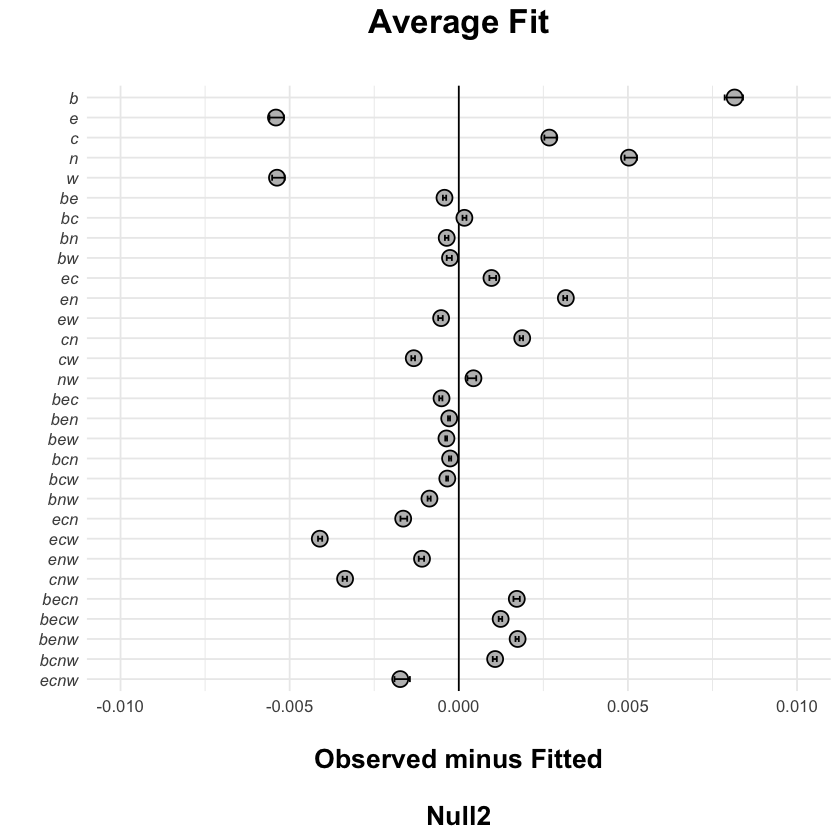

In [15]:
p3

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'βε2' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'βε2' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'βε2' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'βε2' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'βε2' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'βε2' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x

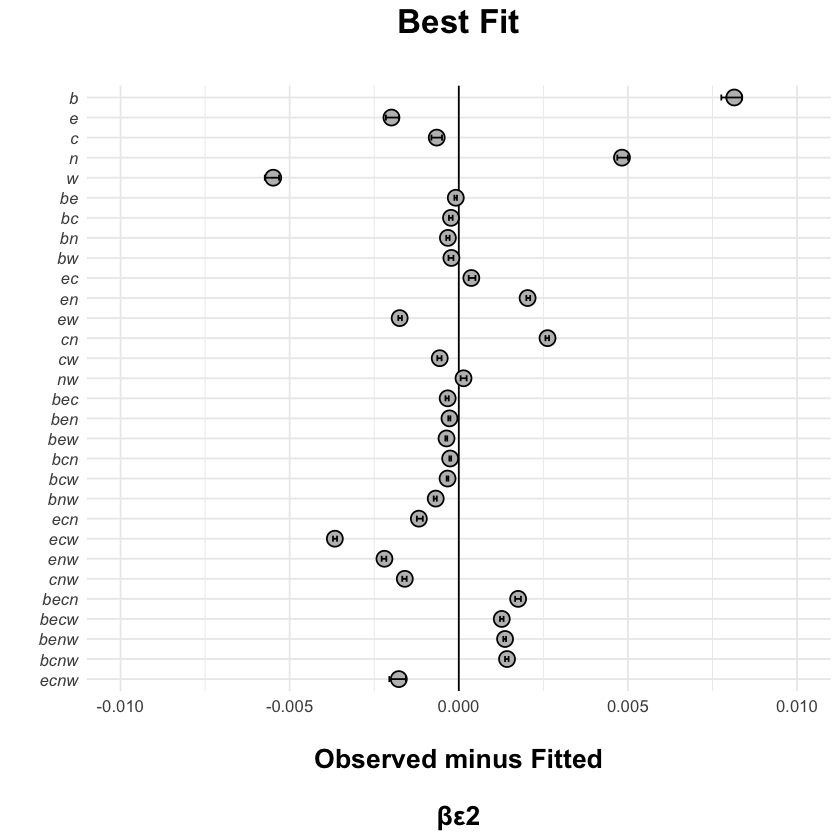

In [16]:
p4

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γζ' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γζ' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γζ' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γζ' in 'mbcsToSbcs': dot substituted for <b6>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γζ' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γζ' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :


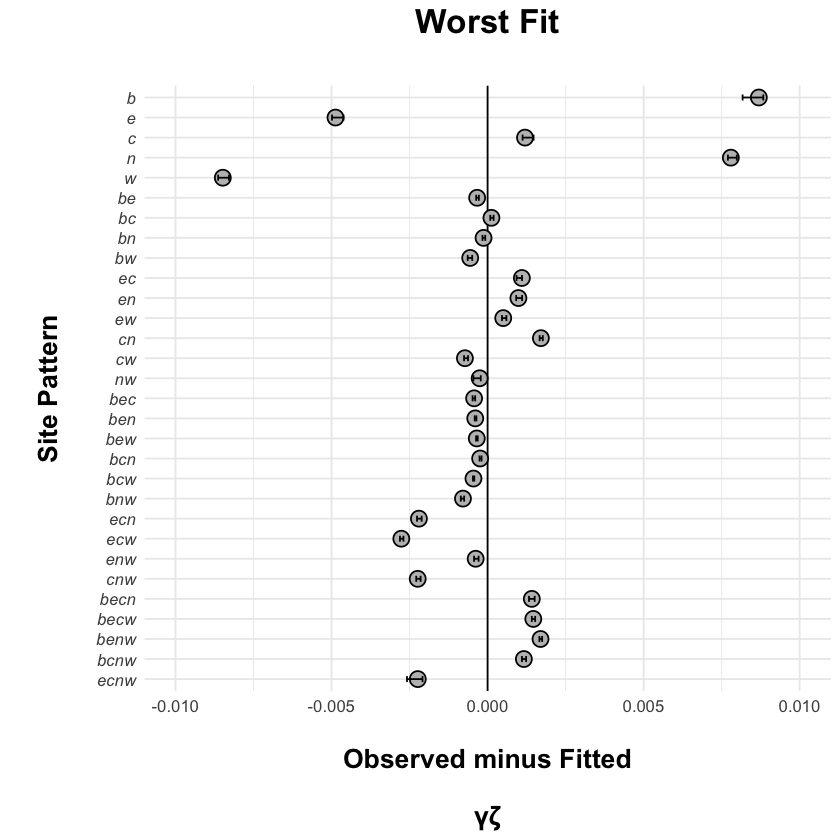

In [17]:
p5

In [18]:
png("autosome_model_residual_plot.png", width = 16, height = 10, units = "in", res = 400)
plot_grid(p5, p3, p4, ncol = 3, scale = 0.8)
dev.off()

pdf 
  2

In [19]:
quartz(type = 'pdf', file = 'autosome_model_residual_plot.pdf', width = 16, height = 10)
plot_grid(p5, p3, p4, ncol = 3, scale = 0.8)
dev.off()

pdf 
  2

## Parameter Bias Check

Load in data. 

In [20]:
est <- read.csv("data/model_be_parameters.csv", header = TRUE, sep = ',')
sims <- read.csv("data/simulated_be_parameters.csv", header = TRUE, sep = ',')
sim2 <- melt(sims)

Using  as id variables



Subset the data.

Let's start with time.

In [21]:
time_est <- subset(est, variable=="Tecnw" | variable=="Tnw" | variable=="Tec" | variable=="Tb" | variable=="Te")
time_sims <- subset(sim2, variable=="Tecnw" | variable=="Tnw" | variable=="Tec" | variable=="Tb" | variable=="Te")

Reorder the levels.

In [22]:
time_est$variable <- factor(time_est$variable, levels = c("Te", "Tec", "Tnw", "Tb", "Tecnw"))
time_sims$variable <- factor(time_sims$variable, levels = c("Te", "Tec", "Tnw", "Tb", "Tecnw"))

Convert to years (rather than generations) using a 25 year generation time (Langergraber et al. 2012).

In [23]:
time_est$value <- time_est$value*25
time_sims$value <- time_sims$value*25

Now for population size.

In [24]:
twoN_est <- subset(est, variable=="twoNbecnw" | variable=="twoNecnw" | variable=="twoNnw" | variable=="twoNec" | variable=="twoNb" | variable=="twoNe" | variable=="twoNw")
twoN_sims <- subset(sim2, variable=="twoNbecnw" | variable=="twoNecnw" | variable=="twoNnw" | variable=="twoNec" | variable=="twoNb" | variable=="twoNe" | variable=="twoNw")

Reorder the levels again.

In [25]:
twoN_est$variable <- factor(twoN_est$variable, levels = c("twoNb", "twoNe", "twoNw", "twoNec", "twoNnw", "twoNecnw", "twoNbecnw"))
twoN_sims$variable <- factor(twoN_sims$variable, levels = c("twoNb", "twoNe", "twoNw", "twoNec", "twoNnw", "twoNecnw", "twoNbecnw"))

Convert from N haploid individuals to N diploid individuals.

In [26]:
twoN_est$value <- twoN_est$value/2
twoN_sims$value <- twoN_sims$value/2

Finally, let's tackle admixture proportion.

In [27]:
admix_est <- subset(est, variable == "m2" | variable=="m5")
admix_sims <- subset(sim2, variable == "m2" | variable=="m5")

Plot. Be careful about relabeling the y-axis below, it needs to be the reverse order of what is reordered above. ggplot seems to label up rather than down.

In [28]:
p6 <- ggplot(data = time_sims, aes(x=value, y=variable)) + 
geom_jitter(height = 0.2, shape=21, fill=NA, colour="grey65", size=3) + 
geom_point(data=time_est, shape = 4, colour="#B90E0A", size=6, stroke=1.5) + 
xlab("\nTime (ka)\n\n") + ylab("") + 
scale_y_discrete(labels = c("ecnw", "\u03b2", "nw", "ec", "\u03b5"), limits = rev(levels(time_sims$variable))) + 
scale_x_continuous(breaks=seq(0, 1100000, 100000), labels=c("0", "100,000", "200,000", "300,000", "400,000", "500,000", "600,000", "700,000", "800,000", "900,000", "1,000,000", "1,100,000")) + 
theme_minimal() + theme(axis.title = element_text(size = 13, face = "bold"), axis.text.x = element_text(size = 12), axis.text.y = element_text(size = 13))

p7 <- ggplot(data = twoN_sims, aes(x=value, y=variable)) +
geom_jitter(height = 0.2, shape=21, fill=NA, colour="grey65", size=3) + 
geom_point(data=twoN_est, shape = 4, colour="#B90E0A", size=6, stroke=1.5) + 
xlab("\nN\u2091\n\n") + ylab("") + 
scale_y_discrete(labels = c("becnw", "ecnw", "nw", "ec", "w", "e", "b"), limits = rev(levels(twoN_sims$variable))) + 
scale_x_continuous(breaks=seq(0, 1100000, 100000), labels=c("0", "100,000", "200,000", "300,000", "400,000", "500,000", "600,000", "700,000", "800,000", "900,000", "1,000,000", "1,100,000")) + 
theme_minimal() + theme(axis.title = element_text(size = 13), axis.title.x = element_text(face = "bold.italic"), axis.title.y = element_text(face = "bold"), axis.text.x = element_text(size = 12), axis.text.y = element_text(size = 13)) 

p8 <- ggplot(data = admix_sims, aes(x=value, y=variable)) + 
geom_jitter(height = 0.2, shape=21, fill=NA, colour="grey65", size=3) + 
geom_point(data=admix_est, shape = 4, colour="#B90E0A", size=6, stroke=1.5) + 
xlab("\nAdmixture Proportion\n\n") + ylab("") + 
scale_y_discrete(labels = c("\u03b2", "\u03b5")) + 
scale_x_continuous(limits=c(0, 0.25)) + theme_minimal() + 
theme(axis.title = element_text(size = 13, face = "bold"), axis.text.x = element_text(size = 12), axis.text.y = element_text(size = 13)) 

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'β' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'β' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ε' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ε' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'β' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'β' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conve

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ε' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ε' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'β' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'β' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ε' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ε' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“co

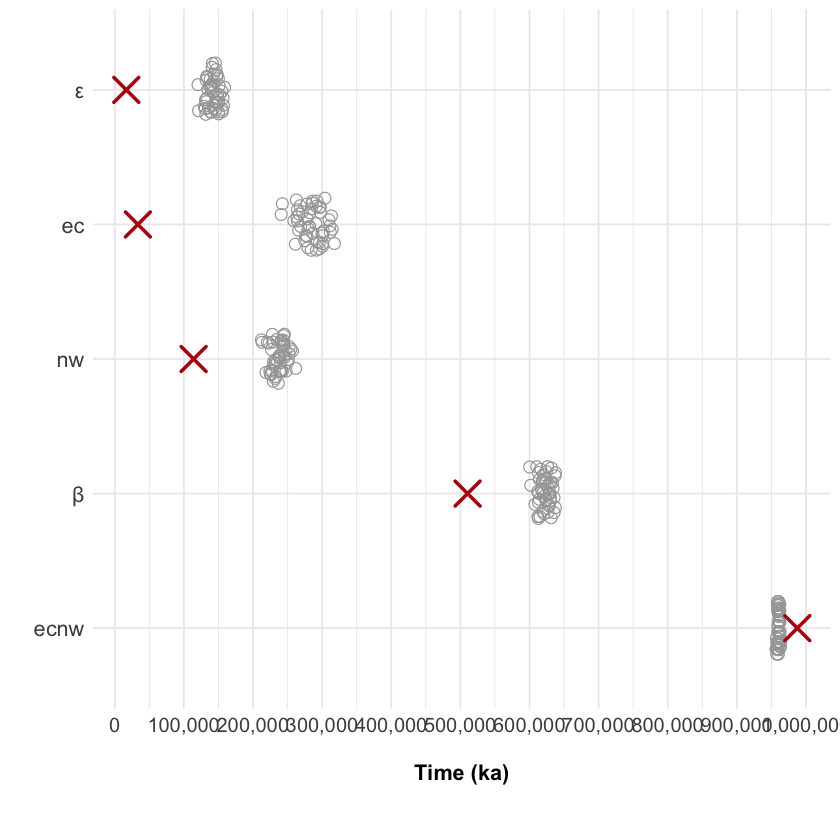

In [29]:
p6

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Nₑ' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Nₑ' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Nₑ' in 'mbcsToSbcs': dot substituted for <91>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Nₑ' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Nₑ' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Nₑ' in 'mbcsToSbcs': dot substituted for <91>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :


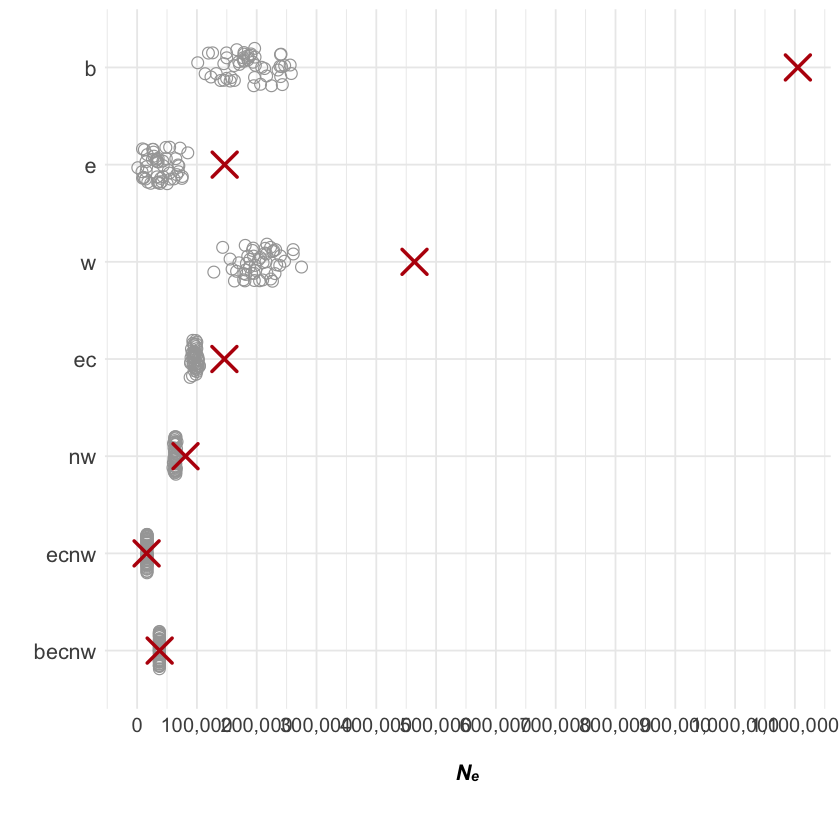

In [30]:
p7

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'β' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'β' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ε' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ε' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'β' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'β' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conve

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ε' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ε' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'β' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'β' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ε' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ε' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“co

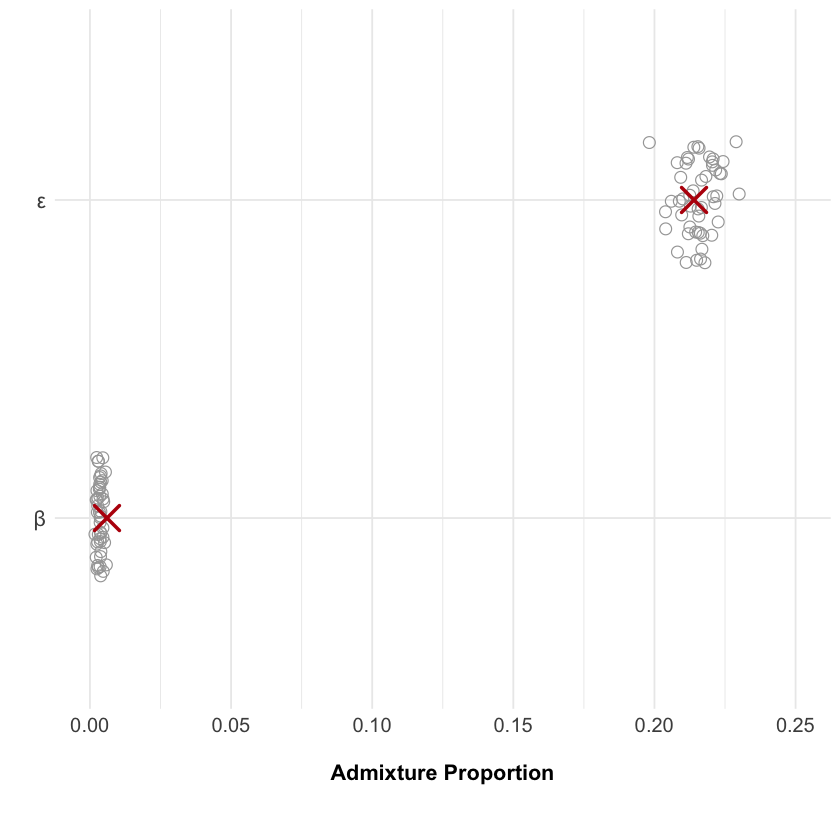

In [31]:
p8

In [32]:
png("model_be_bias_plot.png", width = 12, height = 8, units = "in", res = 300)
plot_grid(p8, p6, p7, ncol = 1, align = "v", rel_heights = c(4.5,6,6))
dev.off()

pdf 
  2

In [33]:
quartz(type = 'pdf', file = 'model_be_bias_plot.pdf', width = 12, height = 8)
plot_grid(p8, p6, p7, ncol = 1, align = "v", rel_heights = c(4.5,6,6))
dev.off()

pdf 
  2

Let's also get a plot with just the point estimate.

In [34]:
p6b <- ggplot(data = time_sims, aes(x=value, y=variable)) + 
geom_point(data=time_est, shape = 4, colour="#B90E0A", size=6, stroke=1.5) + 
xlab("\nTime (ka)\n\n") + ylab("") + 
scale_y_discrete(labels = c("ecnw", "\u03b2", "nw", "ec", "\u03b5"), limits = rev(levels(time_sims$variable))) + 
scale_x_continuous(breaks=seq(0, 1100000, 100000), labels=c("0", "100,000", "200,000", "300,000", "400,000", "500,000", "600,000", "700,000", "800,000", "900,000", "1,000,000", "1,100,000")) + 
theme_minimal() + theme(axis.title = element_text(size = 13, face = "bold"), axis.text.x = element_text(size = 12), axis.text.y = element_text(size = 13))

p7b <- ggplot(data = twoN_sims, aes(x=value, y=variable)) +
geom_point(data=twoN_est, shape = 4, colour="#B90E0A", size=6, stroke=1.5) + 
xlab("\nN\u2091\n\n") + ylab("") + 
scale_y_discrete(labels = c("becnw", "ecnw", "nw", "ec", "w", "e", "b"), limits = rev(levels(twoN_sims$variable))) + 
scale_x_continuous(breaks=seq(0, 1100000, 100000), labels=c("0", "100,000", "200,000", "300,000", "400,000", "500,000", "600,000", "700,000", "800,000", "900,000", "1,000,000", "1,100,000")) + 
theme_minimal() + theme(axis.title = element_text(size = 13), axis.title.x = element_text(face = "bold.italic"), axis.title.y = element_text(face = "bold"), axis.text.x = element_text(size = 12), axis.text.y = element_text(size = 13)) 

p8b <- ggplot(data = admix_sims, aes(x=value, y=variable)) + 
geom_point(data=admix_est, shape = 4, colour="#B90E0A", size=6, stroke=1.5) + 
xlab("\nAdmixture Proportion\n\n") + ylab("") + 
scale_y_discrete(labels = c("\u03b2", "\u03b5")) + 
scale_x_continuous(limits=c(0, 0.25)) + theme_minimal() + 
theme(axis.title = element_text(size = 13, face = "bold"), axis.text.x = element_text(size = 12), axis.text.y = element_text(size = 13)) 

In [35]:
png("model_be_bias_point_estimate_only.png", width = 12, height = 8, units = "in", res = 300)
plot_grid(p8b, p6b, p7b, ncol = 1, align = "v", rel_heights = c(4.5,6,6))
dev.off()

pdf 
  2

## X Chromosome Site Pattern Frequencies

Same procedure as above for the autosomes. Just looking at site patterns from the X chromosome now.

In [36]:
chrx_site_patterns <- read.csv('data/pan_chrx_site_pat.csv', header = TRUE, sep = ',')
chrx_site_patterns$point_estimate_prop <- chrx_site_patterns$point_estimate/sum(chrx_site_patterns$point_estimate)
chrx_site_patterns$low_bound_prop <- chrx_site_patterns$low_bound/sum(chrx_site_patterns$low_bound)
chrx_site_patterns$high_bound_prop <- chrx_site_patterns$high_bound/sum(chrx_site_patterns$high_bound)

In [37]:
head(chrx_site_patterns)

,site_pat,point_estimate,low_bound,high_bound,point_estimate_prop,low_bound_prop,high_bound_prop
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,b,178348.824,176784.122,179565.373,0.291363363,0.292551885,0.289308233
2,e,63064.377,62724.318,63541.066,0.103026465,0.103799579,0.102374712
3,c,67455.564,67162.835,67870.701,0.110200222,0.111144677,0.109350440
4,n,66800.505,66344.915,67189.538,0.109130071,0.109791139,0.108252978
5,w,60122.580,59552.900,60734.279,0.098220536,0.098551346,0.097852536
6,be,1757.617,1614.294,1890.932,0.002871368,0.002671421,0.003046591


In [38]:
chrx_site_patterns$site_pat <- fct_inorder(chrx_site_patterns$site_pat) %>% fct_rev()
subset_chrx_site_patterns <- subset(chrx_site_patterns, point_estimate_prop<0.03)

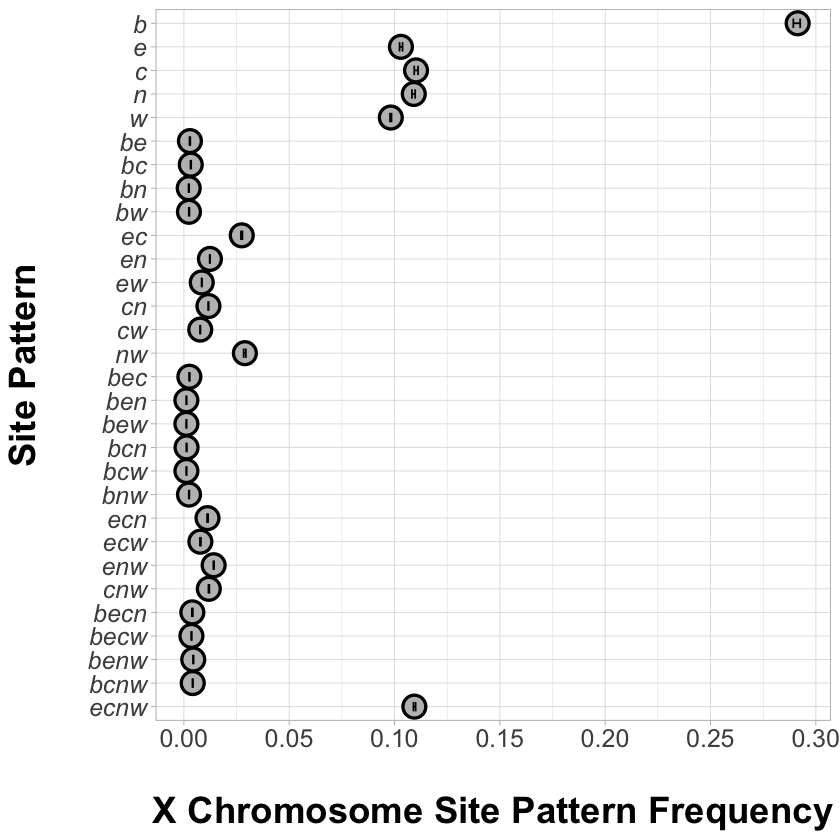

In [39]:
p9 <- ggplot(chrx_site_patterns) + geom_point(data=chrx_site_patterns, aes(x=point_estimate_prop, y=site_pat), shape = 21, color="black", fill="gray", size=5.5, stroke = 1.4) + 
  geom_errorbarh(data=chrx_site_patterns, aes(y=site_pat, xmin=low_bound_prop, xmax=high_bound_prop), height = 0.4) + 
  xlab("\nX Chromosome Site Pattern Frequency") + ylab("Site Pattern\n") + theme_light() + theme(axis.title = element_text(size = 22, face = "bold")) + 
  theme(axis.text.x = element_text(size = 15), axis.text.y = element_text(size = 15, face = "italic")) + 
  scale_x_continuous(breaks=seq(0,0.3,0.05))

p9

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



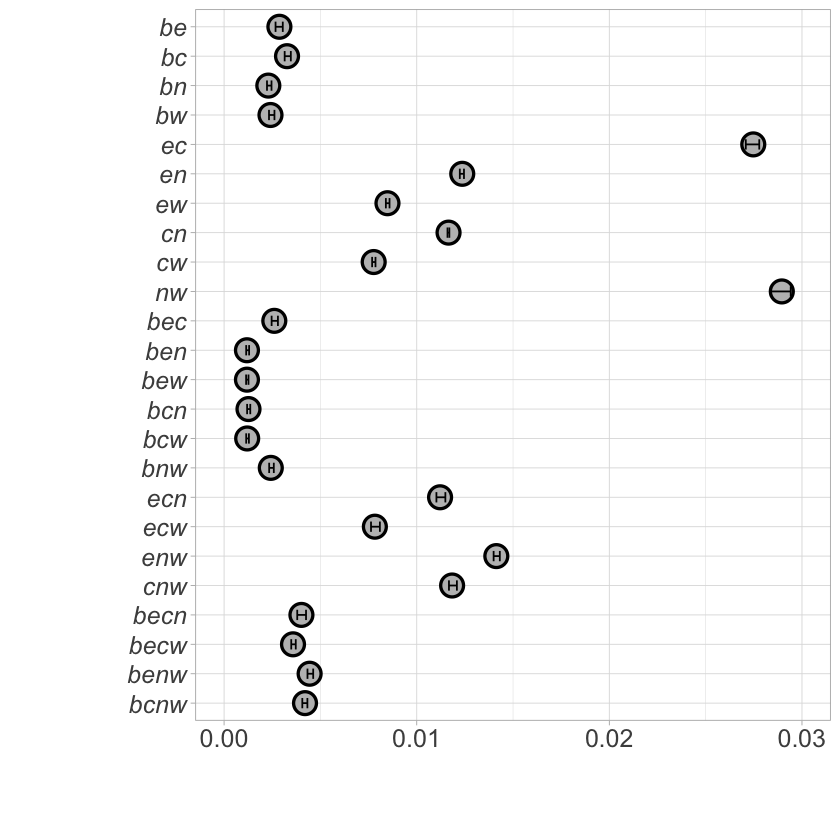

In [40]:
p10 <- ggplot(chrx_site_patterns) + geom_point(data=subset_chrx_site_patterns, aes(x=point_estimate_prop, y=site_pat), shape = 21, color="black", fill="gray", size=5.5, stroke = 1.4) + 
  geom_errorbarh(data=subset_chrx_site_patterns, aes(y=site_pat, xmin=low_bound_prop, xmax=high_bound_prop), height = 0.35) + 
  xlab("\n") + ylab("\n\n") + theme_light() + theme(axis.title = element_text(size = 22, face = "bold")) + 
  theme(axis.text.x = element_text(size = 15), axis.text.y = element_text(size = 15, face = "italic")) + 
  scale_x_continuous(breaks=seq(0,0.3,0.05)) + xlim(0,0.03) 

p10

In [41]:
png("chrx_site_pattern_plot.png", width = 16, height = 10, units = "in", res = 400)
plot_grid(p1, p2, nrow=1)
dev.off()

pdf 
  2

## Comparative X Chromosome Best Model Fit

Let's compare similarly-sized autosomes (5, 7, and 8) to the X chromosome.

Load data.

In [42]:
x_obs <- read.csv("data/x_obs.csv", header = TRUE, sep = ",")
x_fitted <- read.csv("data/x_fitted.csv", header = TRUE, sep = ",")
five_obs <- read.csv("data/five_obs.csv", header = TRUE, sep = ",")
five_fitted <- read.csv("data/five_fitted.csv", header = TRUE, sep = ",")
seven_obs <- read.csv("data/seven_obs.csv", header = TRUE, sep = ",")
seven_fitted <- read.csv("data/seven_fitted.csv", header = TRUE, sep = ",")
eight_obs <- read.csv("data/eight_obs.csv", header = TRUE, sep = ",")
eight_fitted <- read.csv("data/eight_fitted.csv", header = TRUE, sep = ",")

Convert branch lengths to frequencies.

In [43]:
x_obs <- x_obs/rowSums(x_obs)
x_fitted <- x_fitted/rowSums(x_fitted)
five_obs <- five_obs/rowSums(five_obs)
five_fitted <- five_fitted/rowSums(five_fitted)
seven_obs <- seven_obs/rowSums(seven_obs)
seven_fitted <- seven_fitted/rowSums(seven_fitted)
eight_obs <- eight_obs/rowSums(eight_obs)
eight_fitted <- eight_fitted/rowSums(eight_fitted)

Calculate residuals.

In [44]:
x_resid <- x_obs-x_fitted
five_resid <- five_obs-five_fitted
seven_resid <- seven_obs-seven_fitted
eight_resid <- eight_obs-eight_fitted

Add a column designating the observation and the bootstraps.

In [45]:
obs_bootstrap <- c('obs','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap','bootstrap')

x_resid <- cbind(obs_bootstrap, x_resid)
five_resid <- cbind(obs_bootstrap, five_resid)
seven_resid <- cbind(obs_bootstrap, seven_resid)
eight_resid <- cbind(obs_bootstrap, eight_resid)

Melt to make plotting easier.

In [46]:
x_resid <- melt(x_resid, id=c("obs_bootstrap"))
five_resid <- melt(five_resid, id=c("obs_bootstrap"))
seven_resid <- melt(seven_resid, id=c("obs_bootstrap"))
eight_resid <- melt(eight_resid, id=c("obs_bootstrap"))

Subset the observed data for plotting.

In [47]:
x_point <- subset(x_resid, obs_bootstrap == "obs")
five_point <- subset(five_resid, obs_bootstrap == "obs")
seven_point <- subset(seven_resid, obs_bootstrap == "obs")
eight_point <- subset(eight_resid, obs_bootstrap == "obs")

Plot.

In [48]:
p11 <- ggplot(data = five_resid, aes(x=value, y=variable)) + 
  geom_vline(aes(xintercept = 0), colour = "black") + 
  geom_point(data = five_point, shape=21, colour="black", fill="gray", size=4, stroke=0.75) + 
  stat_summary(geom = "errorbar", width = 0.3, fun.min = min, fun.max = max) +
  scale_y_discrete(limits = rev(levels(five_resid$variable))) + 
  xlab("\nObserved minus Fitted\n\nChr 5") + ylab("\nSite Pattern\n") + 
  scale_x_continuous(limits=c(-0.012,0.012)) + theme_minimal() + 
  theme(axis.title = element_text(size = 20)) + 
  theme(axis.title = element_text(face = "bold"), axis.text.x = element_text(size = 16), axis.text.y = element_text(size = 16, face = "italic")) 

p12 <- ggplot(data = seven_resid, aes(x=value, y=variable)) + 
  geom_vline(aes(xintercept = 0), colour = "black") + 
  geom_point(data = seven_point, shape=21, colour="black", fill="gray", size=4, stroke=0.75) + 
  stat_summary(geom = "errorbar", width = 0.3, fun.min = min, fun.max = max) +
  scale_y_discrete(limits = rev(levels(seven_resid$variable))) + 
  xlab("\nObserved minus Fitted\n\nChr 7") + ylab("\n\n\n") + 
  scale_x_continuous(limits=c(-0.012,0.012)) + theme_minimal() + 
  theme(axis.title = element_text(size = 20)) + 
  theme(axis.title = element_text(face = "bold"), axis.text.x = element_text(size = 16), axis.text.y = element_text(size = 16, face = "italic")) 

p13 <- ggplot(data = eight_resid, aes(x=value, y=variable)) + 
  geom_vline(aes(xintercept = 0), colour = "black") + 
  geom_point(data = eight_point, shape=21, colour="black", fill="gray", size=4, stroke=0.75) + 
  stat_summary(geom = "errorbar", width = 0.3, fun.min = min, fun.max = max) +
  scale_y_discrete(limits = rev(levels(eight_resid$variable))) + 
  xlab("\nObserved minus Fitted\n\nChr 8") + ylab("\n\n\n") + 
  scale_x_continuous(limits=c(-0.012,0.012)) + theme_minimal() + 
  theme(axis.title = element_text(size = 20)) + 
  theme(axis.title = element_text(face = "bold"), axis.text.x = element_text(size = 16), axis.text.y = element_text(size = 16, face = "italic"))

p14 <- ggplot(data = x_resid, aes(x=value, y=variable)) + 
  geom_vline(aes(xintercept = 0), colour = "black") + 
  geom_point(data = x_point, shape=21, colour="black", fill="gray", size=4, stroke=0.75) + 
  stat_summary(geom = "errorbar", width = 0.3, fun.min = min, fun.max = max) + 
  scale_y_discrete(limits = rev(levels(x_resid$variable))) + 
  xlab("\nObserved minus Fitted\n\nChr X") + ylab("\n\n\n") + 
  scale_x_continuous(limits=c(-0.012,0.012)) + theme_minimal() + 
  theme(axis.title = element_text(size = 20)) + 
  theme(axis.title = element_text(face = "bold"), axis.text.x = element_text(size = 16), axis.text.y = element_text(size = 16, face = "italic")) 

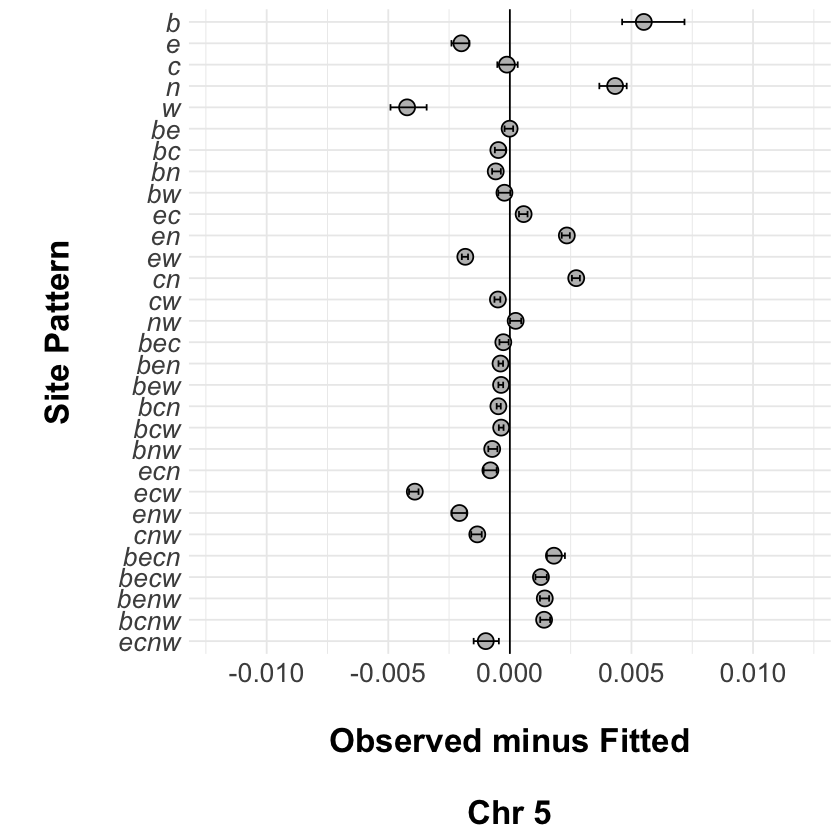

In [49]:
p11

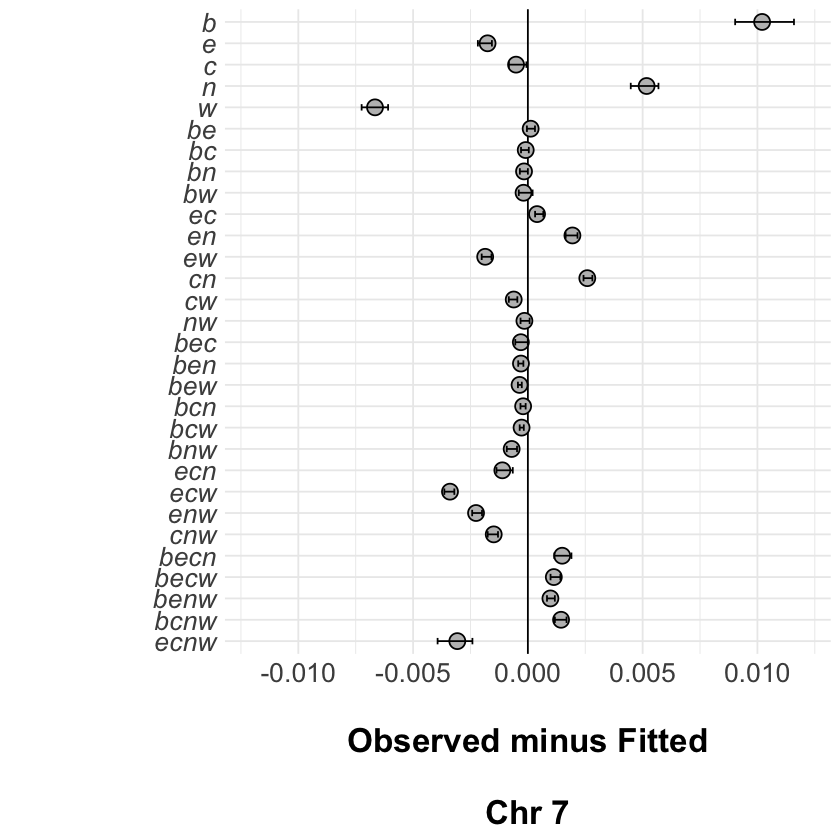

In [50]:
p12

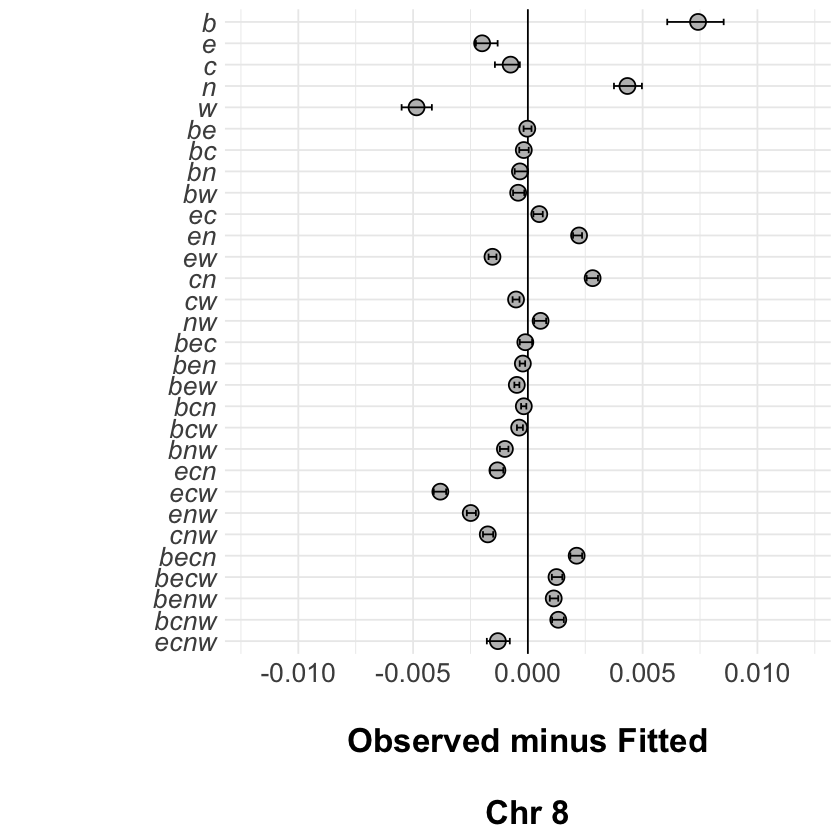

In [51]:
p13

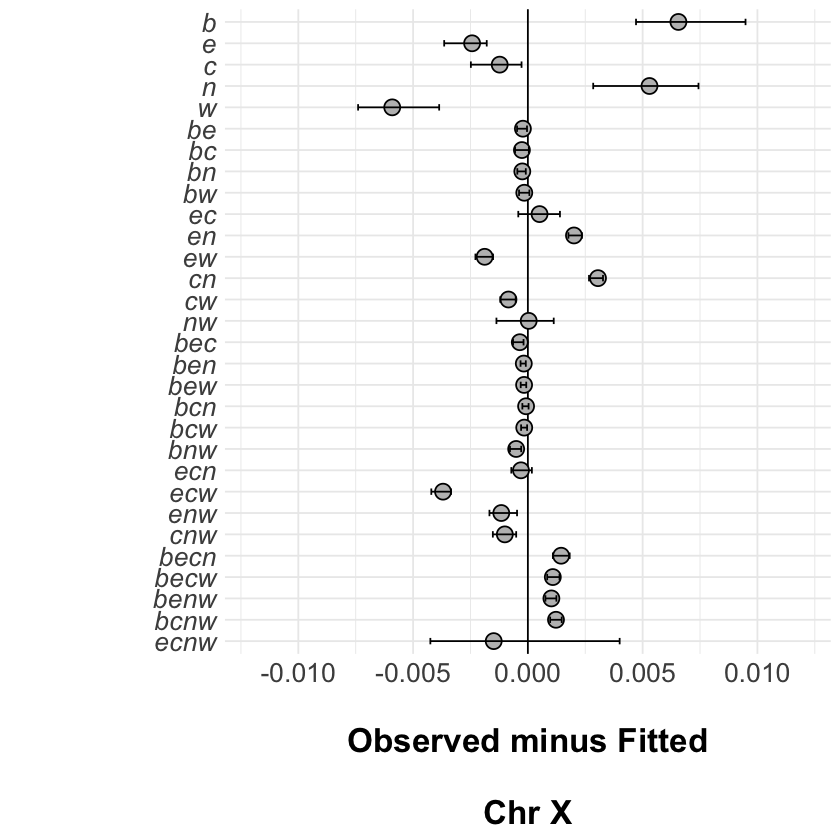

In [52]:
p14

In [53]:
png("five_seven_eight_x_residual_plot.png", width = 24, height = 10, units = "in", res = 400)
plot_grid(p11, p12, p13, p14, ncol = 4)
dev.off()

pdf 
  2

In [54]:
quartz(type = 'pdf', file = 'five_seven_eight_x_residual_plot.pdf', width = 24, height = 10)
plot_grid(p11, p12, p13, p14, ncol = 4)
dev.off()

pdf 
  2

## Model BE Parameter Correlation

Load data.

In [55]:
be_params <- read.csv("data/be_params_cor.csv", header=TRUE, sep=",")
correlations <- cor(be_params)

Plot.

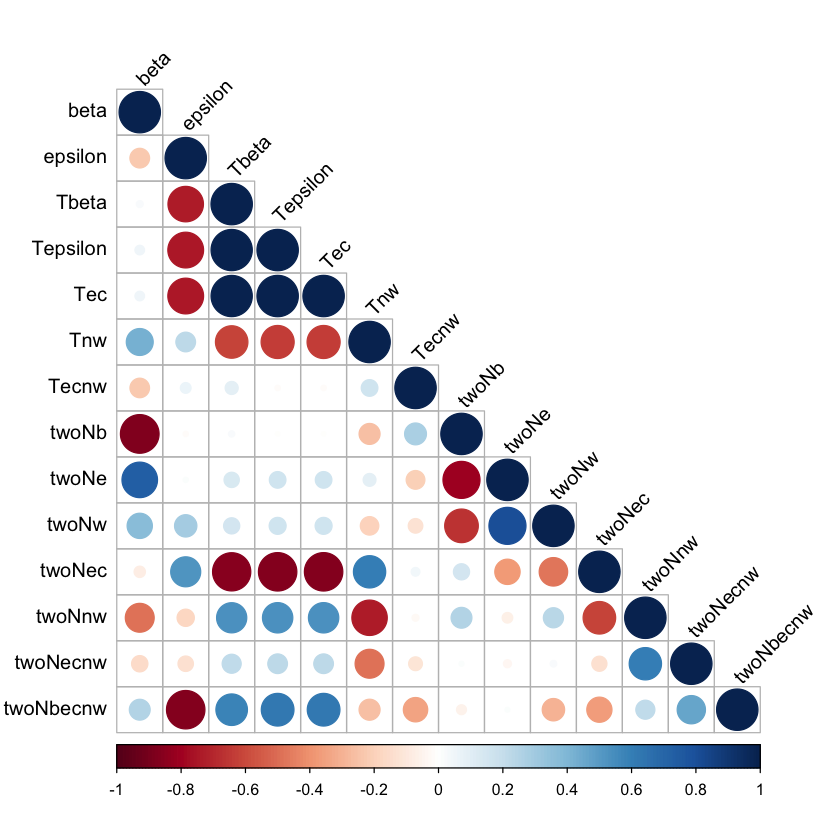

In [56]:
corrplot(correlations, type = "lower", tl.col = "black", tl.srt = 45)

In [57]:
png("be_parameter_correlation_plot.png", width = 8, height = 8, units = "in", res = 300)
corrplot(correlations, type = "lower", tl.col = "black", tl.srt = 45)
dev.off()

pdf 
  2

## Model Rank Correlation

Load data.

In [58]:
models <- read.csv('data/autosome_chrx_model_comaparison.csv', header=TRUE, sep=',')
models$type <- as.factor(models$type)
nrow(models)

[1] 216

Check that everything is in ship shape.

In [59]:
head(models)

,model_name,type,bepe
,<chr>,<fct>,<dbl>
1,be2,autosomes,0.00001161849
2,beg2,autosomes,0.00001167321
3,e2,autosomes,0.00001172003
4,eg2,autosomes,0.00001172025
5,bdeg2,autosomes,0.00001179505
6,beg,autosomes,0.00001195321


Add model ranks separately for the autosomes and X chromosome.

In [60]:
models <- models %>% group_by(type) %>% mutate(rank = rank(bepe))
head(models)

model_name,type,bepe,rank
<chr>,<fct>,<dbl>,<dbl>
be2,autosomes,0.00001161849,1
beg2,autosomes,0.00001167321,2
e2,autosomes,0.00001172003,3
eg2,autosomes,0.00001172025,4
bdeg2,autosomes,0.00001179505,5
beg,autosomes,0.00001195321,6


Now subset to models that occur in both analyses and order models alphabetically.

In [61]:
models_subset <- models %>% group_by(model_name) %>% mutate(model_count = n()>1) %>% filter(model_count == 1)
models_subset <- models_subset %>% arrange(type,model_name)
nrow(models_subset)

[1] 204

In [62]:
head(models_subset)

model_name,type,bepe,rank,model_count
<chr>,<fct>,<dbl>,<dbl>,<lgl>
a,autosomes,0.00001523662,72,TRUE
a2,autosomes,0.00001531481,73,TRUE
ab,autosomes,0.00001493573,71,TRUE
ab2,autosomes,0.00001491451,70,TRUE
abc,autosomes,0.00001771463,104,TRUE
abcd,autosomes,0.00001661952,89,TRUE


Create a vector of autosome model ranks.

In [63]:
autosome_rank <- models_subset %>% filter(type == 'autosomes') %>% pull(rank)
autosome_rank

[1]  72  73  71  70 104  89  86  83  91  85  81 100  53  52  19  18  15  16
 [19]  50  56  23  21  17  20  69  67  97  79  78  76  84  82  77  95  57  51
 [37]  25  24  26  22  58  46  39  35  33  32  74  75  61  60 106 101  98  93
 [55] 105  88  94 102  31  41  13   7  37  42  38  34   9   1  45  47   2  55
 [73]  30  63  65  99  96  90  87 103  92  80 107  59  43  14  11  28  36  49
 [91]  40   8   3  27  10   4  48  29  62  64  68  66

Create a vector of X chromosome model ranks.

In [64]:
x_chromosome_rank <- models_subset %>% filter(type == 'x chromosome') %>% pull(rank)
x_chromosome_rank

[1]  70  69  61  62 101  93  82  75  91  84  76 100  46  50  13   4  15   5
 [19]  54  48  17  11  16  10  64  60  97  86  81  77  85  79  78  94  52  57
 [37]  26  24  21  18  53  45  35  32  37  34  73  71  63  67 102  98  90  87
 [55]  99  92  83 105  36  44   7  14  25  22  51  56  12   2  28  30   1  19
 [73]  31  66  65 104  95  89  80  96  88  74 103  55  49  23  20  40  43  41
 [91]  47  33   9  38  42  29  27  39  72  68  58  59

Run a non-parametric correlation of model ranks.

In [65]:
cor.test(autosome_rank, x_chromosome_rank, method=c("spearman")) 


	Spearman's rank correlation rho

data:  autosome_rank and x_chromosome_rank
S = 7956, p-value < 0.00000000000000022
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.955013 
